<a href="https://colab.research.google.com/github/Harshitamishraz8/task/blob/main/Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Load the Data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Data Exploration


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Statistical summary of the dataset
print(df.describe())

# Check data types
print(df.dtypes)


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mea

 Data Cleaning

In [ ]:
# Handling missing values
df = df.dropna()  # or use df.fillna() for imputation

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to numeric


Define Features and Target Variable

In [ ]:
# Define features and target variable
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable


**Model Training**

Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

 Train the Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Model Evaluation**

 Make Predictions

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1754318687330.6638
R-squared: 0.6529242642153184


**Visualization**

Plot Actual vs. Predicted Values

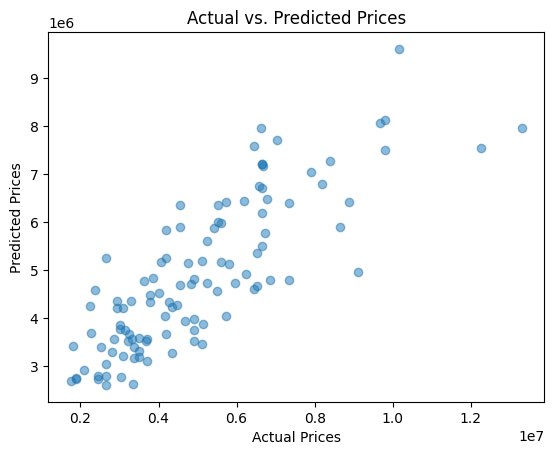

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


Plot Residuals

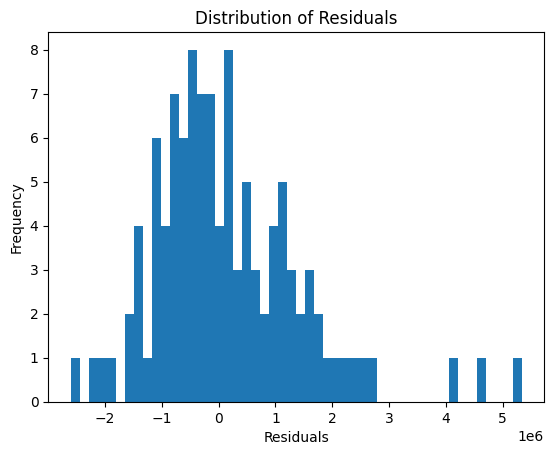

In [ ]:
# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
